# Q2
The goal of this question is to calculate body fat using Brozek’s equation. In this problem, the first column **brozek** is the response variable, and all other columns are treated as the features (we may not use all the features, please only use the ones stated in each question). To start, read the data file fat.csv in the homework folder (containing 252 samples) and split it into two sets. Set 1 includes the first 200 rows of the data (do not count the row associated with the feature/response names), and set 2, which includes the last 52 rows of the data. Name the first set **train** and the second set **test**.

In [41]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize)

In [42]:
Fat = pd.read_csv("fat.csv")
# print(Fat)

In [43]:
train,test = np.split(Fat,[int(200)])
# print(train)
# print('============================================================================')
# print(test)
# print('============================================================================')
y = train['brozek']
# print(y)

In [44]:
X = pd.DataFrame({'intercept': np.ones(train.shape[0]),
                  'siri':    train['siri'],
                  'density': train['density'],
                  'age':     train['age'],
                  'weight':  train['weight'],
                  'height':  train['height'],
                  'adipos':  train['adipos'],
                  'free':    train['free'],
                  'neck':    train['neck'],
                  'chest':   train['chest'],
                  'abdom':   train['abdom'],
                  'hip':     train['hip'],
                  'thigh':   train['thigh'],
                  'knee':    train['knee'],
                  'ankle':   train['ankle'],
                  'biceps':  train['biceps'],
                  'forearm': train['forearm'],
                  'wrist':   train['wrist']})
# print(X)

#### (a) As a first modeling attempt, consider a linear model using all the 17 features, that is brozek = $\beta_0$ + $\beta_1$siri + ... + $\beta_{17}$wrist <br>report the fitted parameters, the 95% confidence interval for each estimated parameter and the p-values.<br> What is the R2 value, and based on that how good do you see the model fitting the training data?

In [45]:
firstModel = sm.OLS(y, X)
firstFittedModel = firstModel.fit()
firstFittedModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 brozek   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.859e+04
Date:                Wed, 17 Apr 2024   Prob (F-statistic):          7.25e-285
Time:                        13:46:53   Log-Likelihood:                 61.275
No. Observations:                 200   AIC:                            -86.55
Df Residuals:                     182   BIC:                            -27.18
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     11.7984      4.641      2.542      0.012       2.641      20.956
siri           0.8845      0.013     66.439      0.000       0.858       0.911
density       -9.5175      4.172     -2.281      0.024     -17.750      -1.285
age           -0.0007      0.002     -0.417      0.677      -0.004       0.003
weight         0.0116      0.005      2.429      0.016       0.002       0.021
height         0.0004      0.005      0.075      0.940      -0.009       0.010
adipos        -0.0213      0.016     -1.361      0.175      -0.052       0.010
free          -0.0134      0.006     -2.324      0.021      -0.025      -0.002
neck          -0.0037      0.011     -0.325      0.746      -0.026       0.019
chest          0.0034      0.005      0.631      0.529      -0.007       0.014
abdom          0.0005      0.005      0.090      0.929      -0.010       0.011
hip           -0.0037      0.007     -0.496      0.620      -0.018       0.011
thigh          0.0199      0.008      2.579      0.011       0.005       0.035
knee          -0.0305      0.013     -2.386      0.018      -0.056      -0.005
ankle          0.0037      0.010      0.359      0.720      -0.017       0.024
biceps        -0.0159      0.009     -1.871      0.063      -0.033       0.001
forearm        0.0196      0.010      1.891      0.060      -0.001       0.040
wrist          0.0340      0.027      1.246      0.214      -0.020       0.088
==============================================================================
Omnibus:                      146.785   Durbin-Watson:                   1.875
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8218.452
Skew:                           2.048   Prob(JB):                         0.00
Kurtosis:                      34.136   Cond. No.                     1.48e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### (b) Based on α = 0.05 and the calculated p-values, 10 features seem problematic.
| feature | p-value |
| --- | --- |
| age | 0.677 |
| height | 0.940 |
| adipos | 0.175 |
| neck | 0.746 |
| chest | 0.529 |
| abdom | 0.929 |
| hip | 0.620 |
| ankle | 0.720 |
| biceps | 0.063 |
| wrist | 0.214 |


#### (c) Calculate the prediction error using your test file.

In [46]:
X_test = pd.DataFrame({'intercept': np.ones(test.shape[0]),
                  'siri':    test['siri'],
                  'density': test['density'],
                  'age':     test['age'],
                  'weight':  test['weight'],
                  'height':  test['height'],
                  'adipos':  test['adipos'],
                  'free':    test['free'],
                  'neck':    test['neck'],
                  'chest':   test['chest'],
                  'abdom':   test['abdom'],
                  'hip':     test['hip'],
                  'thigh':   test['thigh'],
                  'knee':    test['knee'],
                  'ankle':   test['ankle'],
                  'biceps':  test['biceps'],
                  'forearm': test['forearm'],
                  'wrist':   test['wrist']})
print(X_test)

     intercept  siri  density  age  weight  height  adipos   free  neck  \
200        1.0  12.2   1.0709   43  178.25   70.25    25.4  155.9  37.8   
201        1.0  22.1   1.0484   43  150.00   69.25    22.0  117.5  35.2   
202        1.0  28.7   1.0340   43  200.50   71.50    27.6  144.9  37.9   
203        1.0   6.0   1.0854   44  184.00   74.00    23.7  171.4  37.9   
204        1.0  34.8   1.0209   44  223.00   69.75    32.3  148.5  40.9   
205        1.0  16.6   1.0610   44  208.75   73.00    27.6  174.2  41.9   
206        1.0  32.9   1.0250   44  166.00   65.50    27.2  113.5  39.1   
207        1.0  32.8   1.0254   47  195.00   72.50    26.1  133.6  40.2   
208        1.0   9.6   1.0771   47  160.50   70.25    22.9  144.3  36.0   
209        1.0  10.8   1.0742   47  159.75   70.75    22.5  141.8  34.5   
210        1.0   7.1   1.0829   49  140.50   68.00    21.4  129.5  35.8   
211        1.0  27.2   1.0373   49  216.25   74.50    27.4  159.3  40.2   
212        1.0  19.5   1.

In [47]:
# the actual value from test dataset
y_actual = test['brozek'].values
# print(y_actual)

# the value predicted by the first model
y_pred_first = firstFittedModel.predict(X_test)
# print(y_pred_first)

y_actual = np.array(y_actual)
y_pred_first = np.array(y_pred_first)

e1 = np.sqrt(sum(np.square(y_actual - y_pred_first)))
print('Prediction Error e1 =', e1)

Prediction Error e1 = 0.753742369836337


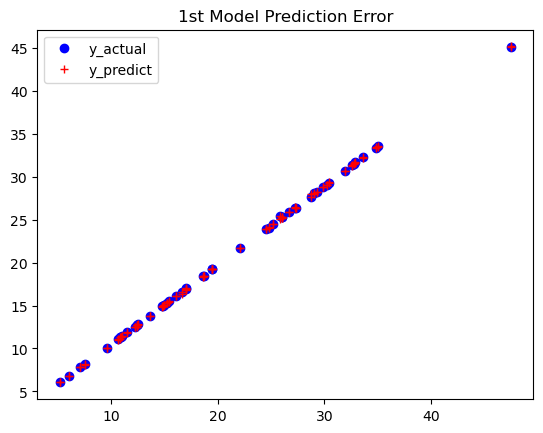

In [58]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(test['siri'], y_actual, "bo", label="y_actual")
ax.plot(np.hstack((test['siri'], X_test['siri'])), np.hstack((y_actual, y_pred_first)), "r+", label="y_predict")
plt.title('1st Model Prediction Error')
ax.legend(loc="best")

#### (d) Now consider a second model which uses the features indicated in part (a), with the only difference that density is replaced by inverse density. Repeat the steps in part (a) and report the values.


In [49]:
X_second = pd.DataFrame({'intercept': np.ones(train.shape[0]),
                  'siri':    train['siri'],
                  'density': 1/train['density'],
                  'age':     train['age'],
                  'weight':  train['weight'],
                  'height':  train['height'],
                  'adipos':  train['adipos'],
                  'free':    train['free'],
                  'neck':    train['neck'],
                  'chest':   train['chest'],
                  'abdom':   train['abdom'],
                  'hip':     train['hip'],
                  'thigh':   train['thigh'],
                  'knee':    train['knee'],
                  'ankle':   train['ankle'],
                  'biceps':  train['biceps'],
                  'forearm': train['forearm'],
                  'wrist':   train['wrist']})
# print(X_second)

In [50]:
secondFittedModel = sm.OLS(y, X_second).fit()
secondFittedModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 brozek   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.852e+04
Date:                Wed, 17 Apr 2024   Prob (F-statistic):          1.00e-284
Time:                        13:46:53   Log-Likelihood:                 60.917
No. Observations:                 200   AIC:                            -85.83
Df Residuals:                     182   BIC:                            -26.46
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -8.0827      4.536     -1.782      0.076     -17.032       0.867
siri           0.8865      0.013     67.497      0.000       0.861       0.912
density       10.3645      4.867      2.129      0.035       0.761      19.968
age           -0.0007      0.002     -0.423      0.673      -0.004       0.003
weight         0.0109      0.005      2.287      0.023       0.001       0.020
height         0.0005      0.005      0.094      0.925      -0.009       0.010
adipos        -0.0206      0.016     -1.320      0.189      -0.051       0.010
free          -0.0125      0.006     -2.161      0.032      -0.024      -0.001
neck          -0.0038      0.011     -0.332      0.740      -0.026       0.019
chest          0.0031      0.005      0.583      0.561      -0.008       0.014
abdom          0.0005      0.005      0.098      0.922      -0.010       0.011
hip           -0.0039      0.007     -0.529      0.598      -0.019       0.011
thigh          0.0199      0.008      2.580      0.011       0.005       0.035
knee          -0.0305      0.013     -2.386      0.018      -0.056      -0.005
ankle          0.0036      0.010      0.352      0.725      -0.017       0.024
biceps        -0.0158      0.009     -1.850      0.066      -0.033       0.001
forearm        0.0193      0.010      1.858      0.065      -0.001       0.040
wrist          0.0339      0.027      1.239      0.217      -0.020       0.088
==============================================================================
Omnibus:                      144.182   Durbin-Watson:                   1.875
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8277.916
Skew:                           1.977   Prob(JB):                         0.00
Kurtosis:                      34.268   Cond. No.                     1.58e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
# the value predicted by the second model
y_pred_second = np.array(secondFittedModel.predict(X_test))
e2 = np.sqrt(sum(np.square(y_actual - y_pred_second)))
print('Second Prediction Error e2 =', e2)

Second Prediction Error e2 = 7.766138616196848


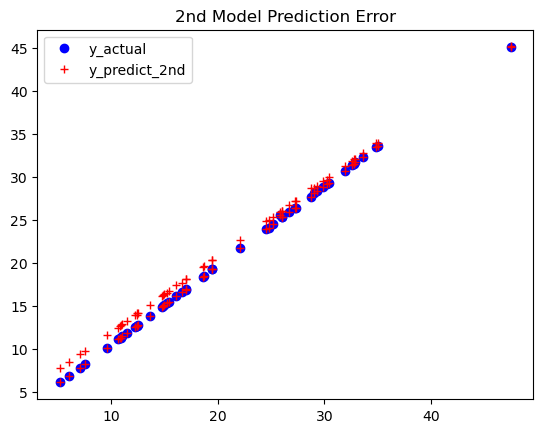

In [59]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(test['siri'], y_actual, "bo", label="y_actual")
ax.plot(np.hstack((test['siri'], X_test['siri'])), np.hstack((y_actual, y_pred_second)), "r+", label="y_predict_2nd")
plt.title('2nd Model Prediction Error')
ax.legend(loc="best")

In [53]:
X_third = pd.DataFrame({'intercept': np.ones(train.shape[0]),
                  'siri':        train['siri'],
                  'siri_square': train['siri'] ** 2,
                  'inv_density': 1/train['density'],
                  'density':     train['density']})
# print(X_third)
thirdFittedModel = sm.OLS(y, X_third).fit()
thirdFittedModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 brozek   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 7.648e+04
Date:                Wed, 17 Apr 2024   Prob (F-statistic):          2.51e-310
Time:                        13:46:54   Log-Likelihood:                 51.125
No. Observations:                 200   AIC:                            -92.25
Df Residuals:                     195   BIC:                            -75.76
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept   -1298.6590    567.083     -2.290      0.023   -2417.062    -180.256
siri            0.9618      0.027     35.651      0.000       0.909       1.015
siri_square    -0.0030      0.001     -2.275      0.024      -0.006      -0.000
inv_density   706.0142    305.636      2.310      0.022     103.237    1308.791
density       598.1825    262.950      2.275      0.024      79.592    1116.773
==============================================================================
Omnibus:                      138.737   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12413.875
Skew:                           1.696   Prob(JB):                         0.00
Kurtosis:                      41.447   Cond. No.                     2.68e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.68e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### (g) Based on α = 0.05 and the calculated p-values, which features seem problematic?

#### All the p-values of the features are less than 0.05
| feature | p-value |
| --- | --- |
| intercept | 0.023 |
| siri | 0.00 |
| $siri^2$ | 0.024 |
| $\frac{1}{density}$ | 0.022 |
| density | 0.024 |

#### (h) Repeat part (c) for this model and call the error e3.

In [54]:
X_test_third = pd.DataFrame({'intercept': np.ones(test.shape[0]),
                  'siri':        test['siri'],
                  'siri_square': test['siri'] ** 2,
                  'inv_density': 1/test['density'],
                  'density':     test['density']})
# print(X_test_third)

# the value predicted by the third model
y_pred_third = np.array(thirdFittedModel.predict(X_test_third))
e3 = np.sqrt(sum(np.square(y_actual - y_pred_third)))
print('Third Prediction Error e3 =', e3)

Third Prediction Error e3 = 0.563361670359713


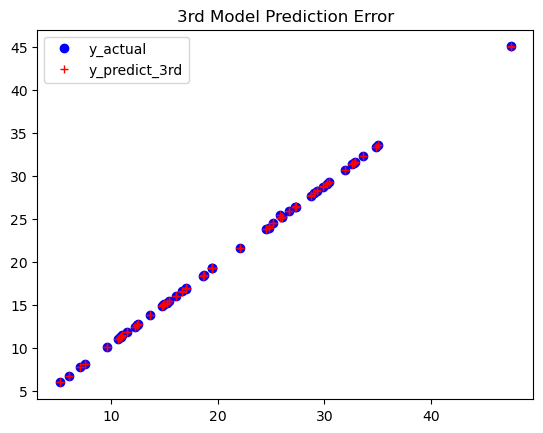

In [60]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(test['siri'], y_actual, "bo", label="y_actual")
ax.plot(np.hstack((test['siri'], X_test_third['siri'])), np.hstack((y_actual, y_pred_third)), "r+", label="y_predict_3rd")
plt.title('3rd Model Prediction Error')
ax.legend(loc="best")

#### (i) Based on the values e1, e2 and e3, and the model formulations, which model would you pick and why (state two reasons)?

#### All of these three models' R-squared and Adj. R-squared are the same and close to 1.<br>Therefore, I will pick the third model since the prediction error is the least and all the p-values are not over 0.05.